# Analysis of the autism data

In [32]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


# Experiments

* This section aims at answering a few questions related to the different algorithms used, with the aim of optimizing our classification framework.

**Parameters or potential settings**

* The approach used, which could be Logistic Regression, Decision Tree, Explainable Boosting Machine, Neural Additive models, or XGBoost.
* The use or not of indicator variables as inputs. 
* The scaling of the data. 
* The imputation approach when the learning algorithms does not handle them by design. It could be constant imputation (called encoding here), or conditional imputation (mean, knn, or mice).
* The sampling method in the case of imbalance learning (either no down-sampling, vanilla (random sampling of the minority class until classes are balanced), or SMOTE (a more elaborated sampling).
* The number of features, between 2 and 6. 
* The number of folds when cross-validating the results. 

**Notes on the classification pipeline:**

* Two datasets are age-matched but one (scenario `asd_td_age_matched_n_balanced`) lead to relatively balanced classes, whereas the scenario `asd_td_age_matched_n_unbalanced` has slightly younger kids and so leverage the amount of young neuro-typical kids, and is more unbalanced. 
* No searches on hyper-parameters are performed on each of the approach. Cross-validation is performed with the stratified inner-fold being left-out, the model is fitted on the training set, and the prediction of the test set is done with predictions stored for later evaluation of performances. 
* since a lot of settings parameters are tested, we test all of the hypothesis with a default setting that is: Encoding of the missing variables, scaling of the data, no use of indicator variables, no down-sampling (???), and a 16-fold cross-validation.
* Features selection were made for the two scenario suing the features with the higher importance based on xgboost importance map.
* Classification here is between autistic and neurotypical participants.



**Among the questions at stakes:**

* Experiment 1: Shall we use indicator variables? For each scenario (columns of axes), ad each dimension of the problem (rows of axes) , x is the `use_of_indicator_variables`, y is an indicator of performances (typically the F1 score), and the hue variable are the approaches. The plots are performed for no imputations, 
* Experiement 2: Shall we scale data or not ? 
* Experiment X: for the algorithms handling missing variables (xgboost, nam with encoding) , shall we let them be missing, or imputed ? 

In [34]:
df =  pd.read_csv("/home01/sam/df_all.csv")

## Preliminary. Feature selection based on importance map using NAM, EBM and XGBOOST

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.998,0.997,0.998,0.938,1.0,0.983,0.87,0.983,0.964,0.989,0.98,0.966,0.993,0.011,0.034,0.007


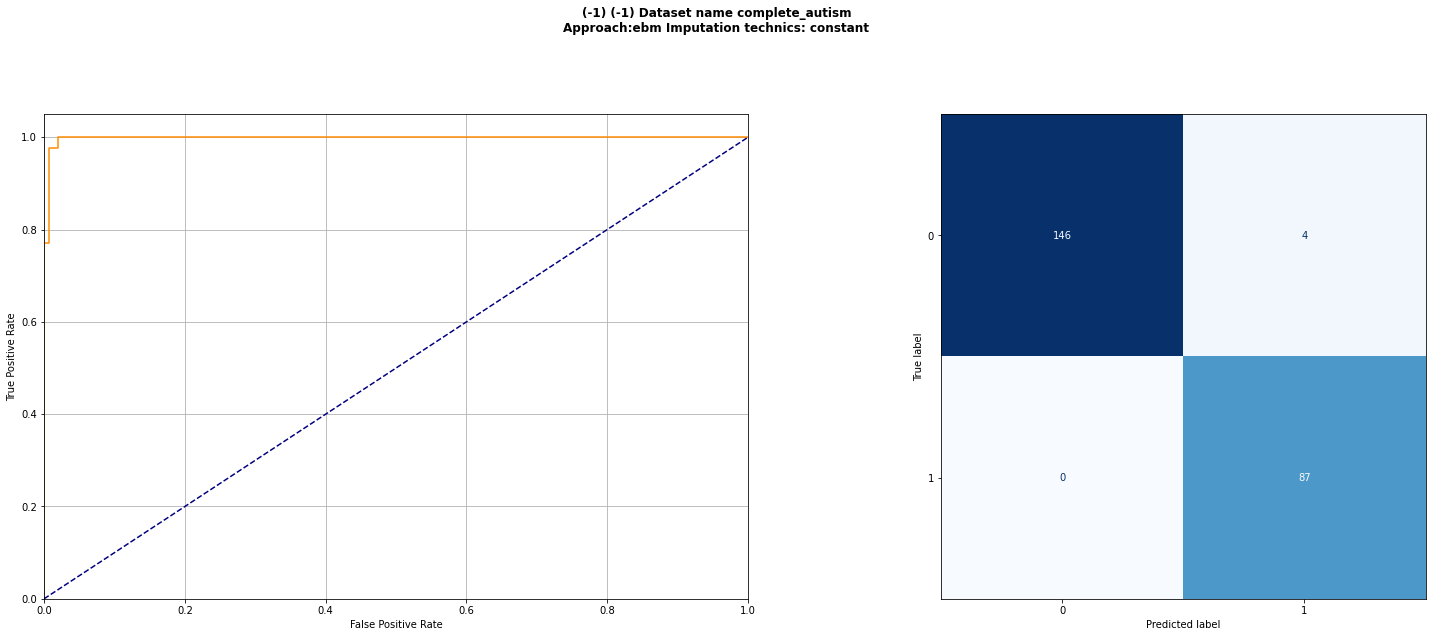

<!-- http://127.0.0.1:7001/139711879050256/ -->

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,1.0,0.998,1.0,0.988,1.0,0.989,0.964,0.992,0.972,0.977,0.995,0.977,0.995,0.023,0.023,0.005


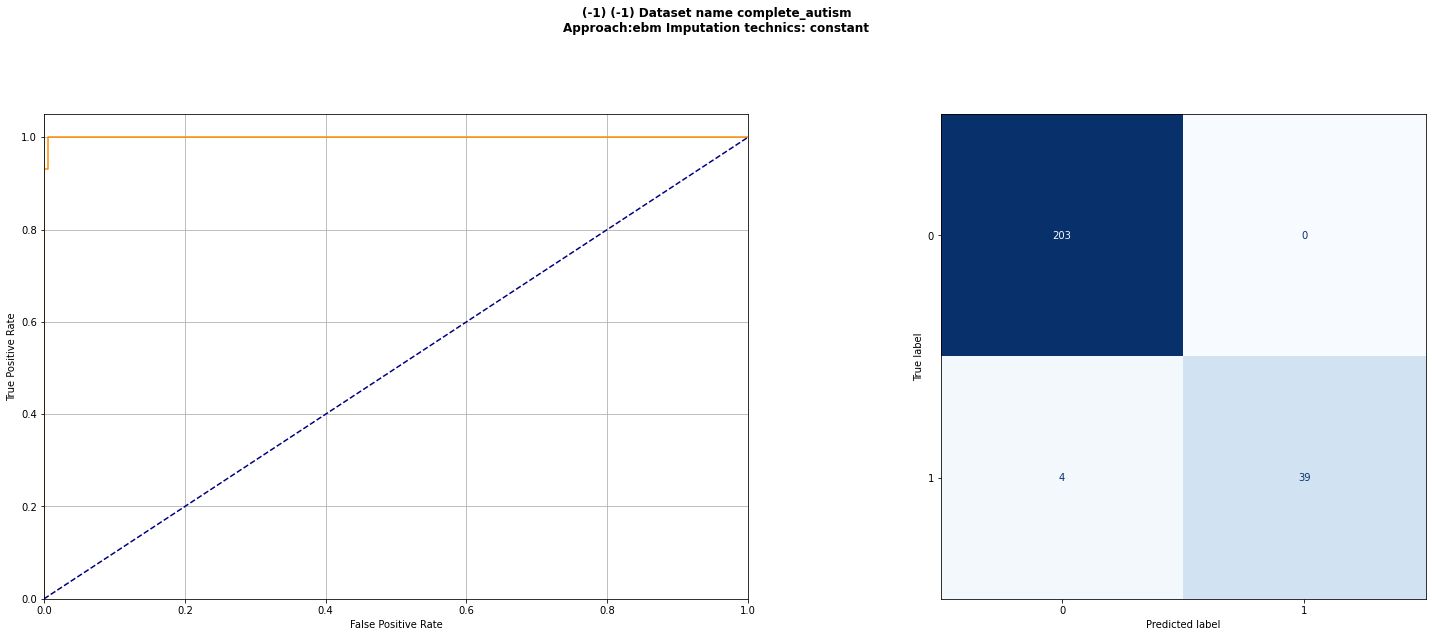

<!-- http://127.0.0.1:7001/139711882789392/ -->

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.962,0.932,0.982,0.746,0.999,0.859,0.701,0.925,0.807,0.85,0.952,0.865,0.946,0.15,0.135,0.054


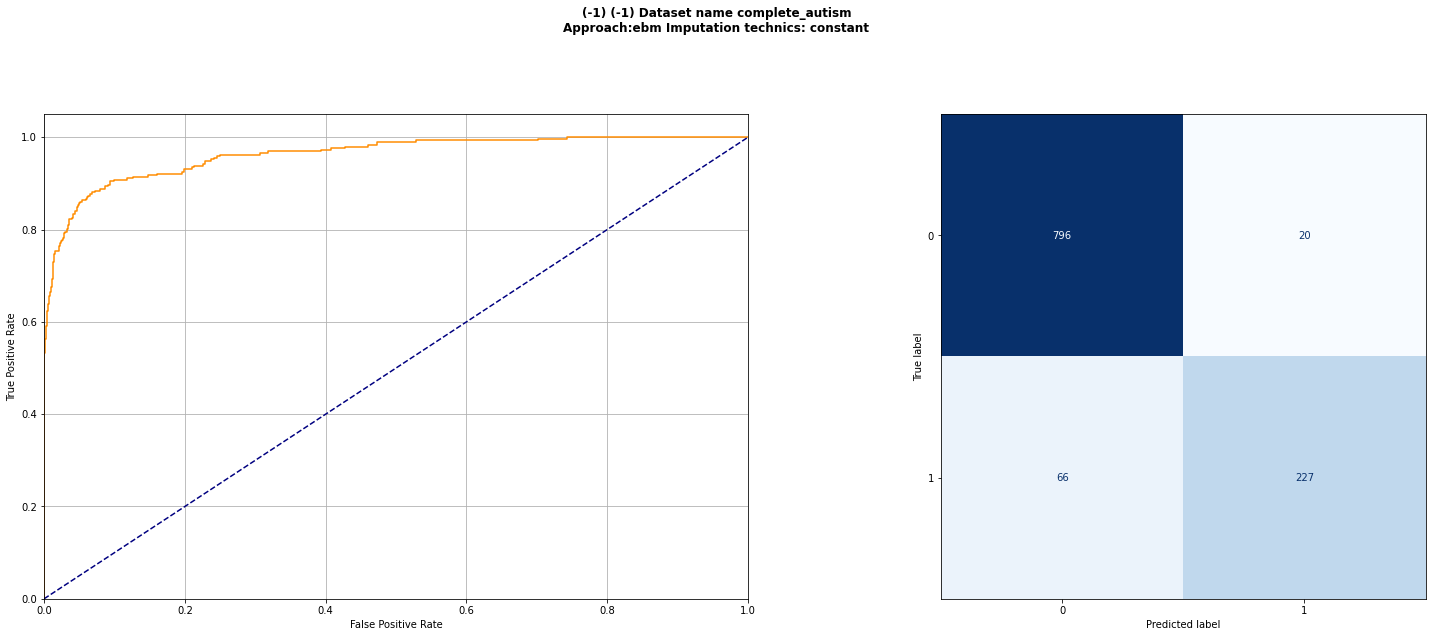

<!-- http://127.0.0.1:7001/139711884803536/ -->

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.999,0.998,0.999,0.953,1.0,0.994,0.892,0.992,0.982,0.989,0.993,0.989,0.993,0.011,0.011,0.007


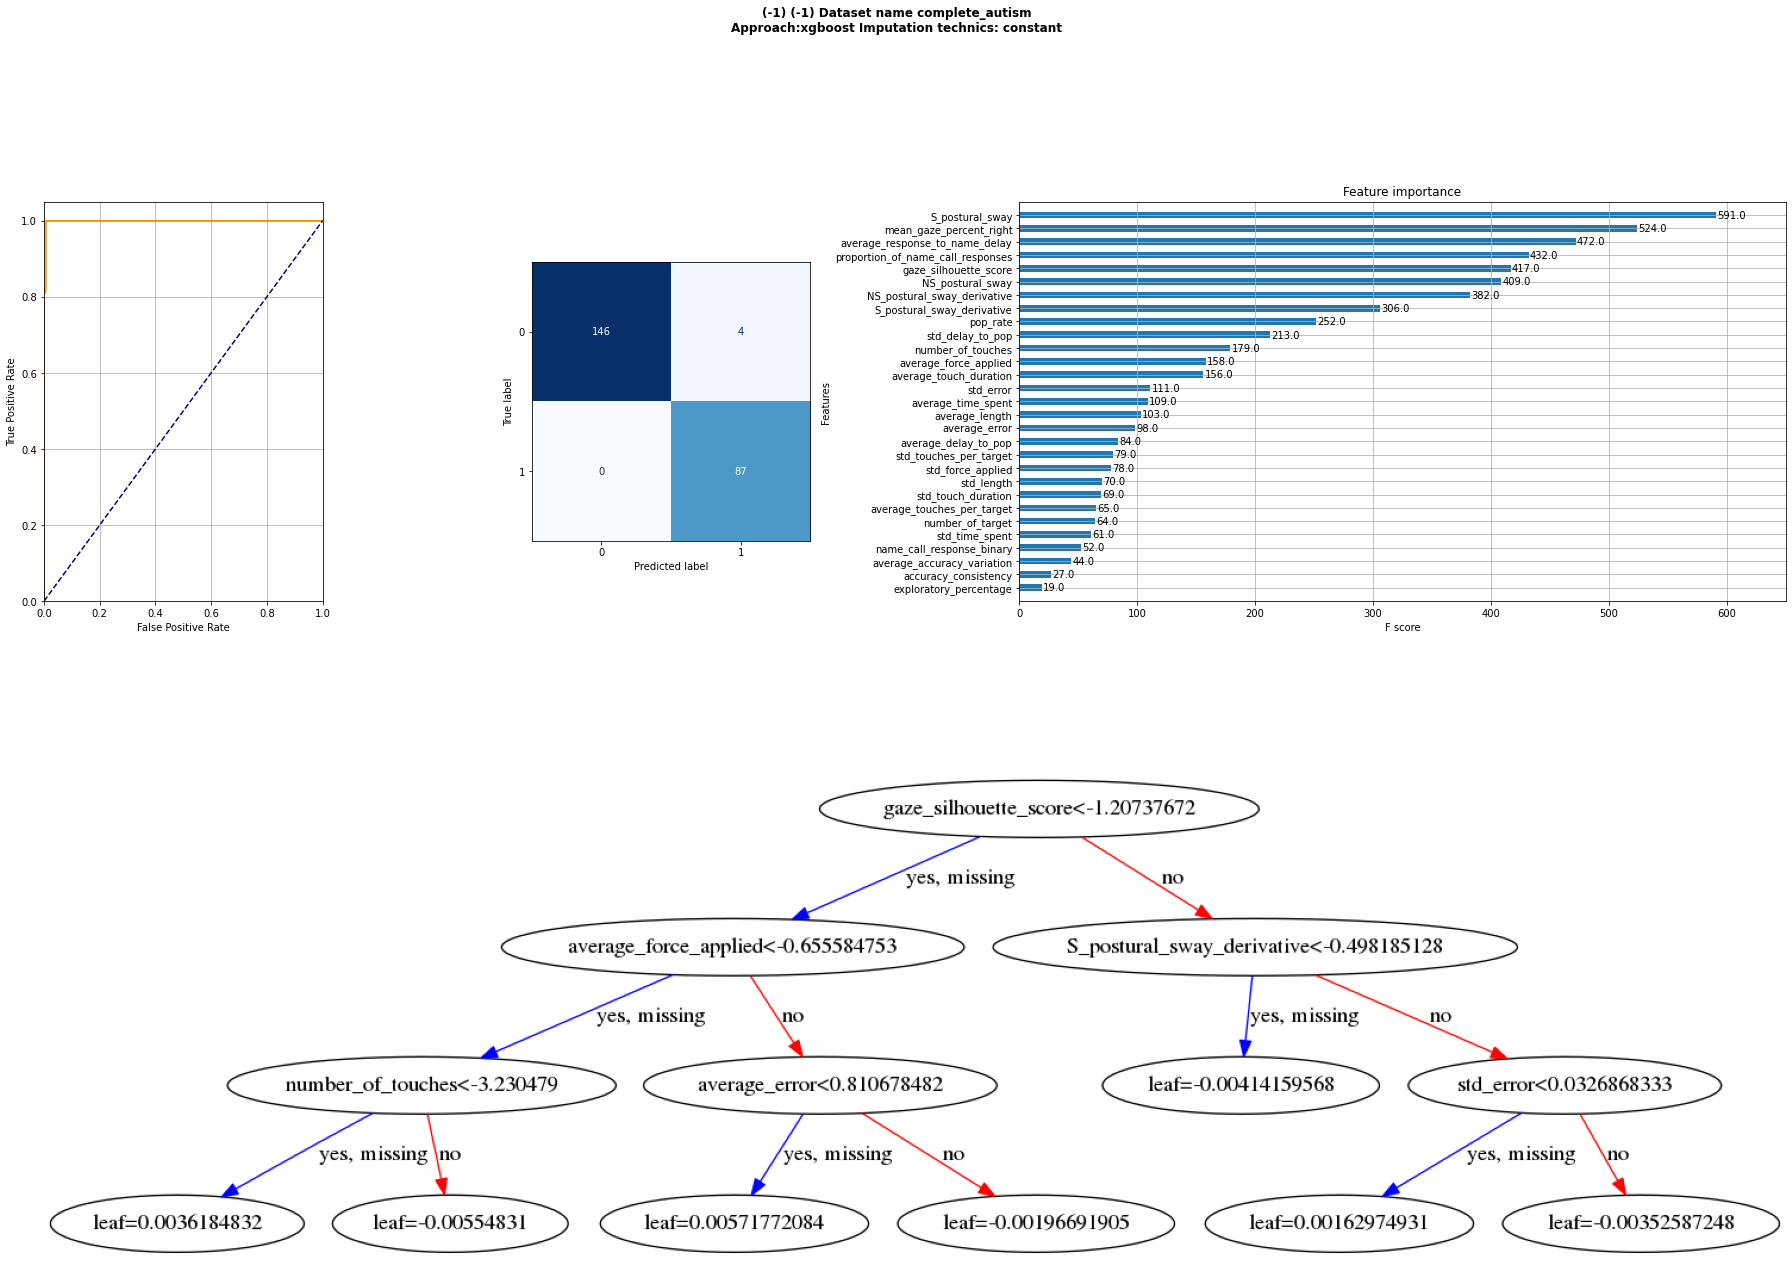

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996,0.986,0.977,1.0,1.0,0.995,0.023,0.0,0.005


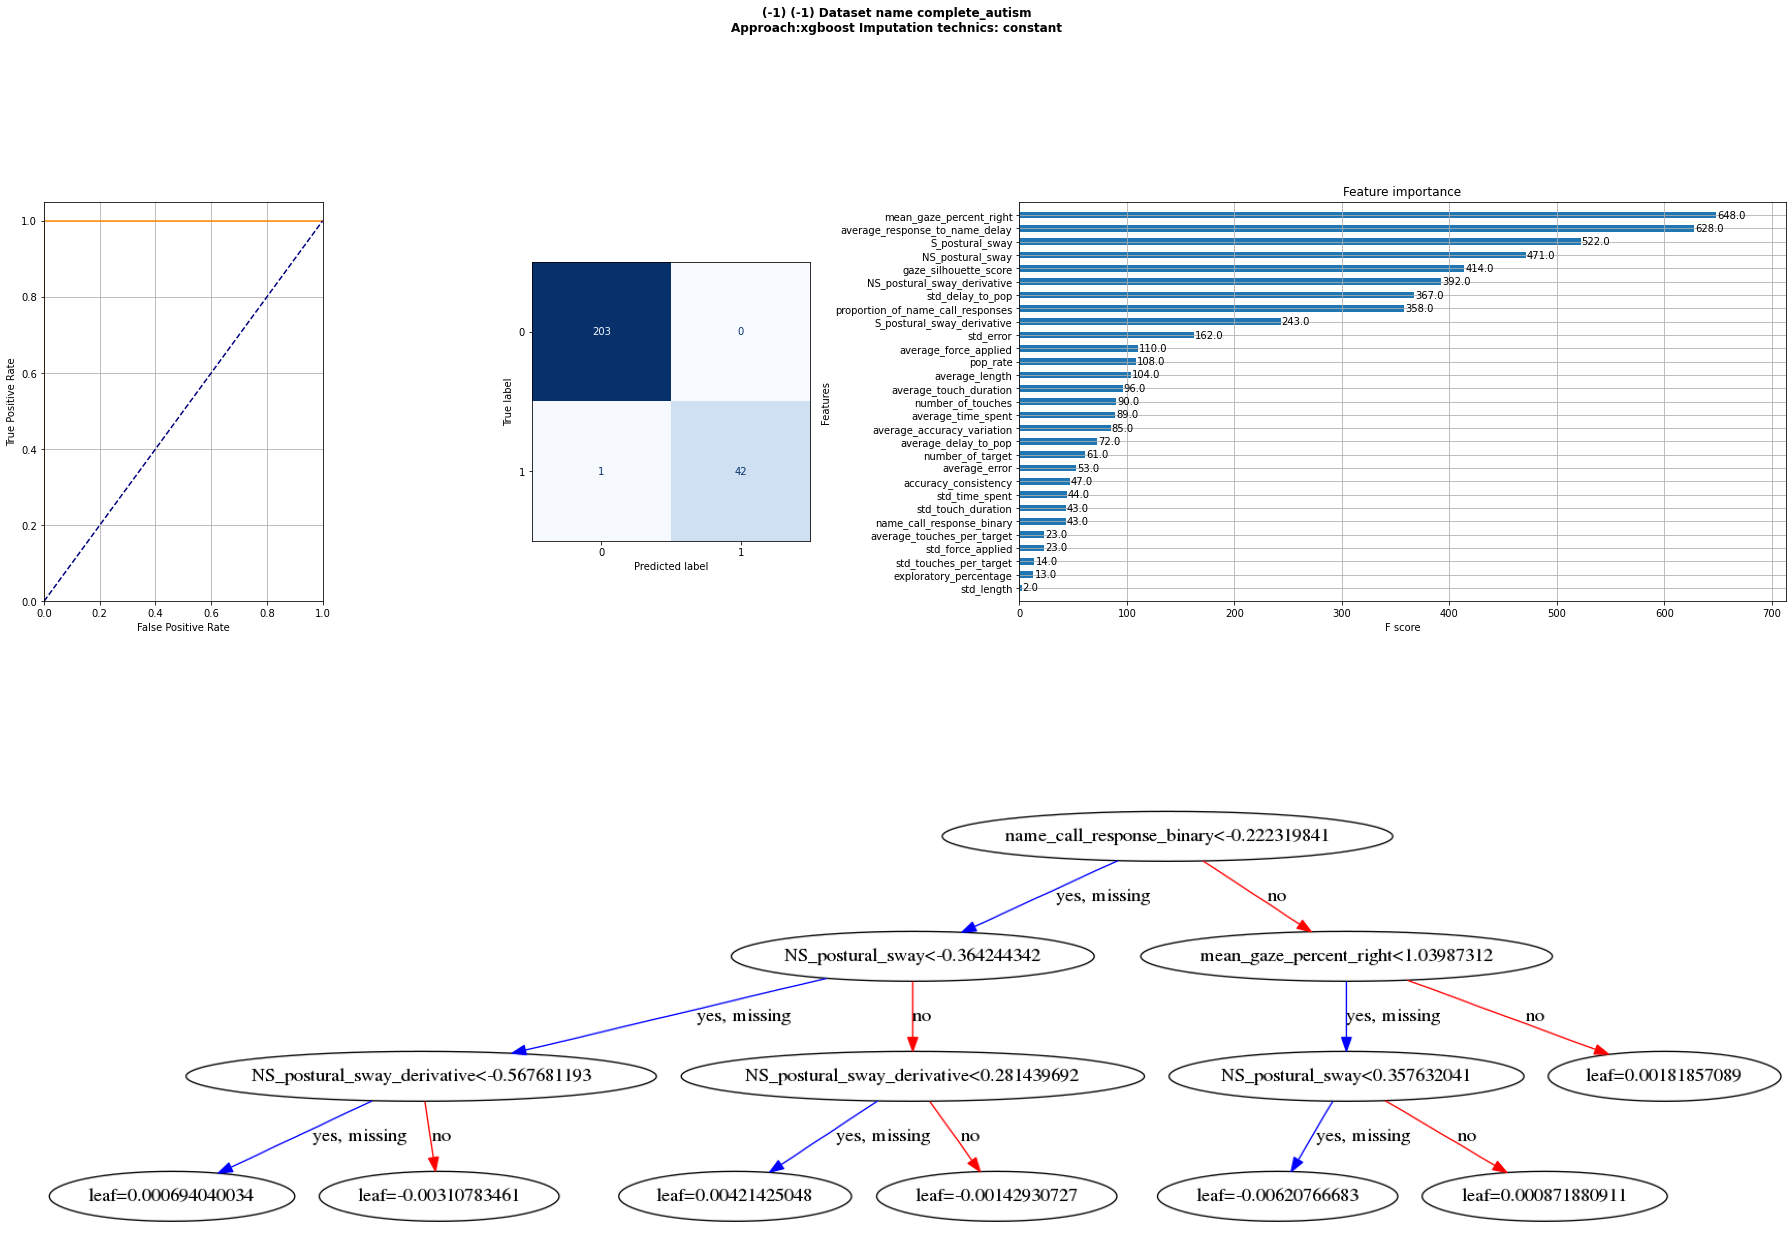

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.974,0.949,0.988,0.777,0.999,0.887,0.737,0.942,0.849,0.843,0.978,0.932,0.945,0.157,0.068,0.055


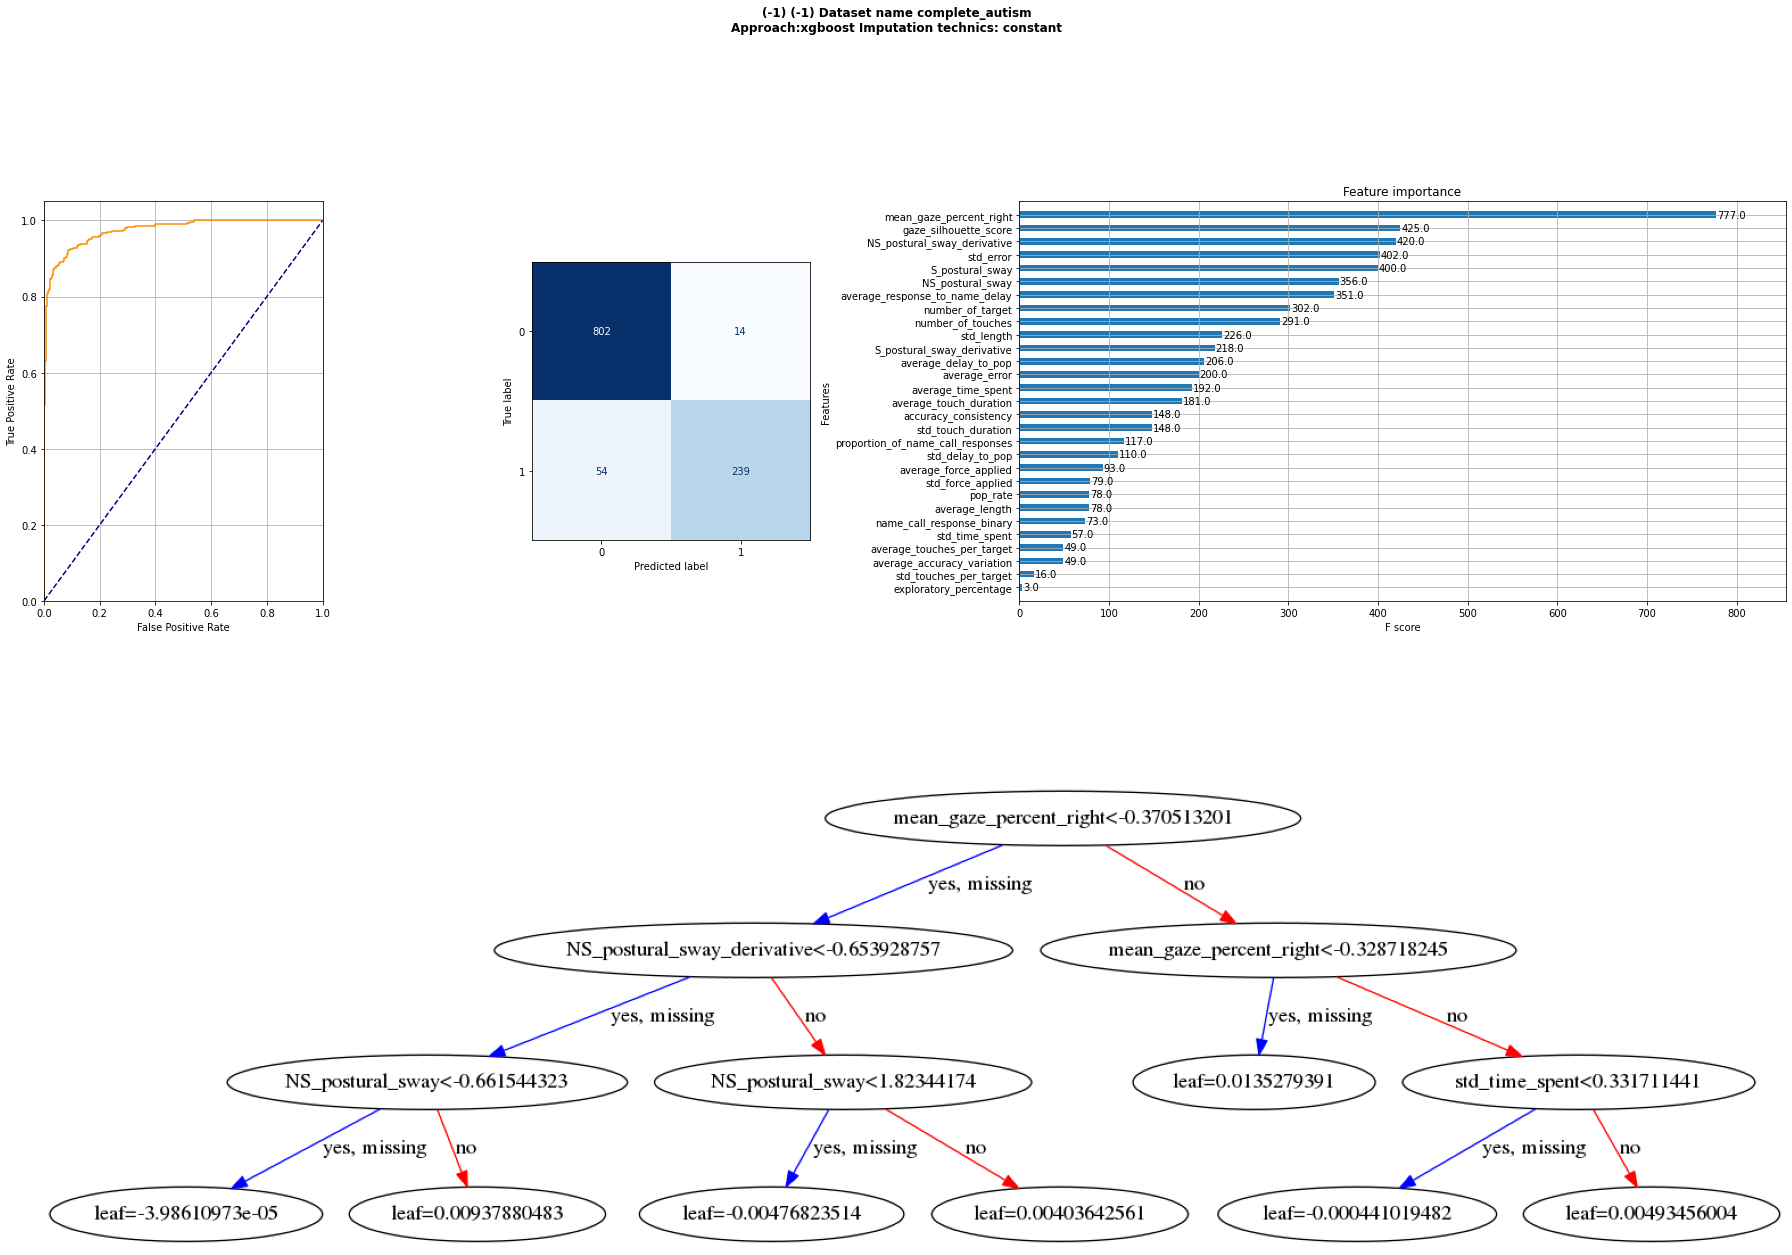

In [11]:
from interpret.glassbox import ExplainableBoostingClassifier

set_of_features  = {}
features_importance = {'ebm': pd.DataFrame(columns=DEFAULT_PREDICTORS), 
                       'xgboost': pd.DataFrame(columns=DEFAULT_PREDICTORS)}

for approach in ['ebm', 'xgboost']:
    set_of_features[approach] = {}
    features_importance[approach] = pd.DataFrame(columns=DEFAULT_PREDICTORS)
    for scenario in ['young', 'papers', 'papers_match', 'all']:




        #df =  pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
        df =  pd.read_csv("/home01/sam/df_all.csv")
        data = Dataset(df=df, 
                       missing_data_handling='encoding', 
                       imputation_method='without', 
                       sampling_method='without',
                       outcome_column='diagnosis',
                        features_name = DEFAULT_PREDICTORS, 
                        scale_data=True,
                        use_missing_indicator_variables=False,
                       verbosity=0,
                       scenario=scenario,
                       proportion_train=1)

        exp = Experiments(data.dataset_name,
                      dataset=data, 
                        approach=approach, 
                        previous_experiment=None,        
                        verbosity=1, 
                        debug=True, 
                        save_experiment=False)

        exp.fit_predict()
        exp.plot()

        if exp.approach == 'ebm':

            # Store 15 best features for each scenario
            ebm_global = exp.model.explain_global()
            ordered_features = np.array(ebm_global.feature_names)[np.argsort(ebm_global._internal_obj['overall']['scores'])]
            ordered_features = [f for f in ordered_features if ' x ' not in f]

            set_of_features[approach][scenario] = ordered_features[-15:]
            dict_feature_importance = {feature_name:score/np.max(ebm_global._internal_obj['overall']['scores']) for feature_name, score in zip(DEFAULT_PREDICTORS, ebm_global._internal_obj['overall']['scores']) }
            
            scenario_feature_importance = pd.DataFrame(dict_feature_importance, index=[scenario])
            features_importance[approach] = features_importance[approach].append(scenario_feature_importance)

        elif exp.approach == 'xgboost':

            scenario_feature_importance = pd.DataFrame(exp.model.get_booster().get_score(importance_type='weight', fmap=''), index=[scenario])
            features_importance[approach] = features_importance[approach].append(scenario_feature_importance/scenario_feature_importance.max().max())

            set_of_features[approach][scenario] = pd.DataFrame(exp.model.get_booster().get_score(importance_type='weight', fmap=''), index=[0]).transpose()[0].sort_values(ascending=False).index[:15]


,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.855,0.691,0.732,0.087,0.802,0.765,0.177,0.802,0.604,0.851,0.773,0.685,0.899,0.149,0.315,0.101


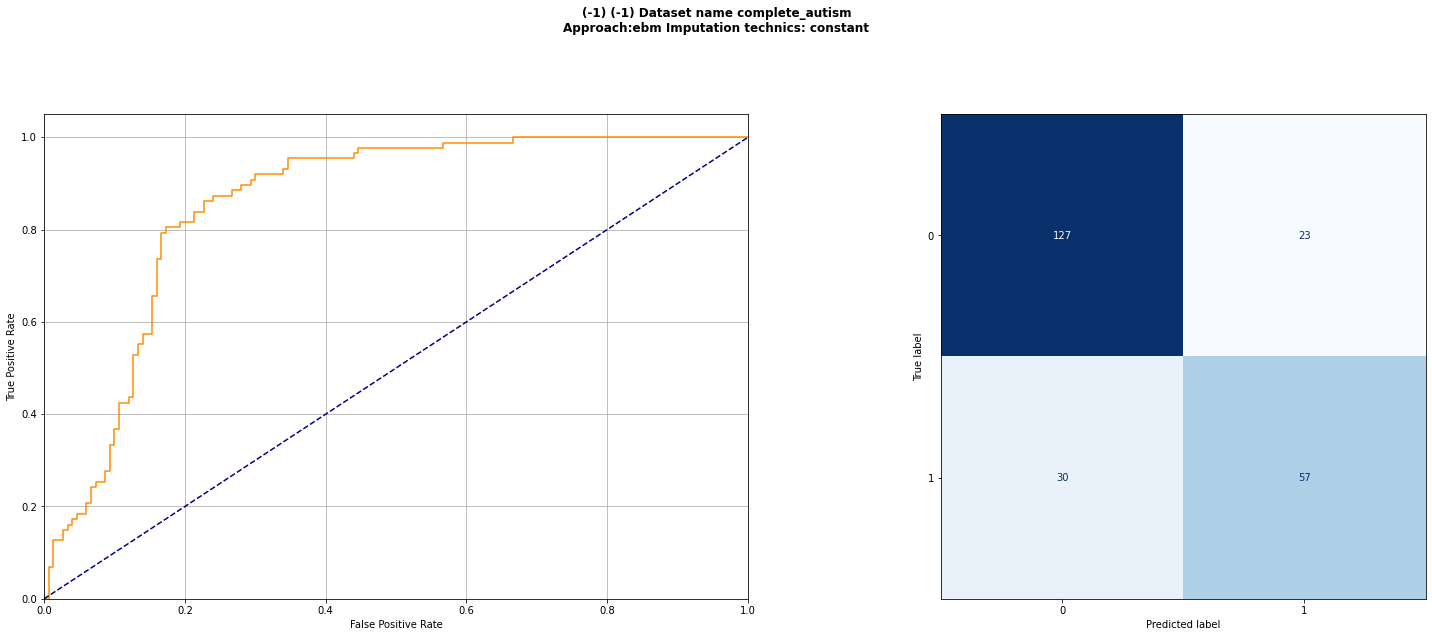

<!-- http://127.0.0.1:7001/139711731964368/ -->

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.836,0.553,0.851,0.193,0.971,0.541,0.281,0.768,0.422,0.744,0.773,0.41,0.935,0.256,0.59,0.065


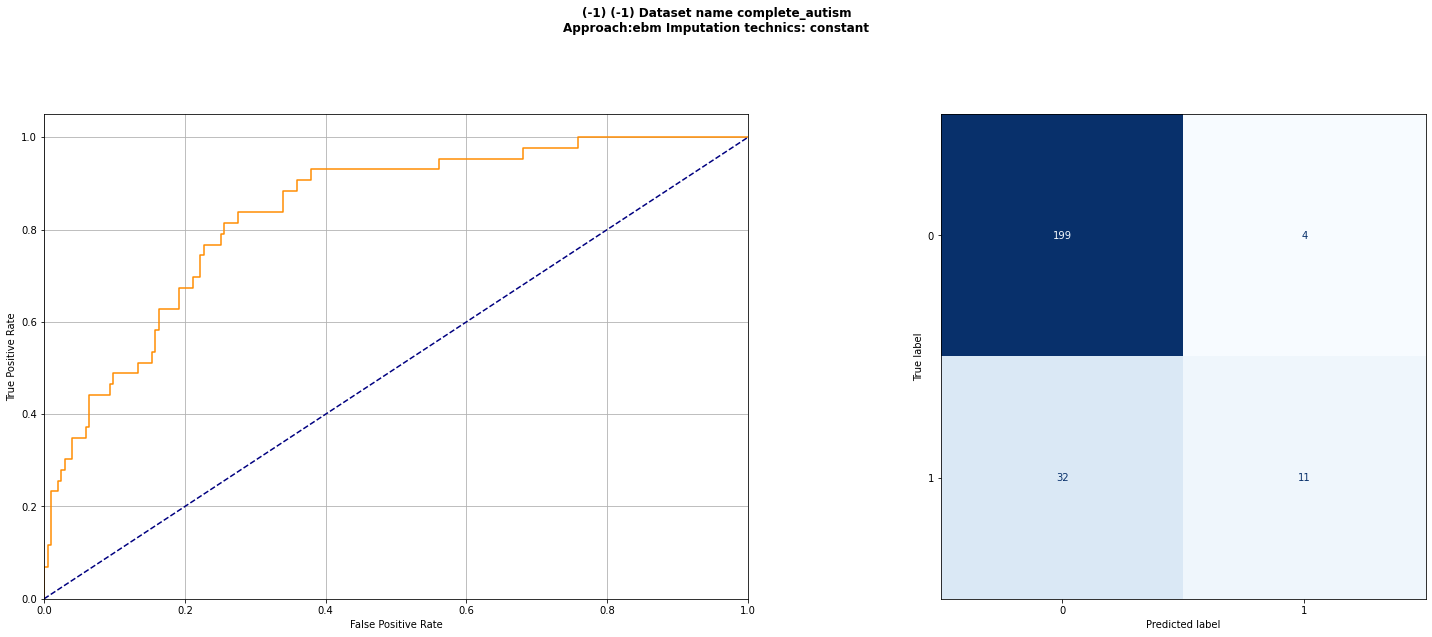

<!-- http://127.0.0.1:7001/139715750097040/ -->

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.917,0.823,0.932,0.366,0.99,0.76,0.423,0.875,0.673,0.741,0.923,0.775,0.908,0.259,0.225,0.092


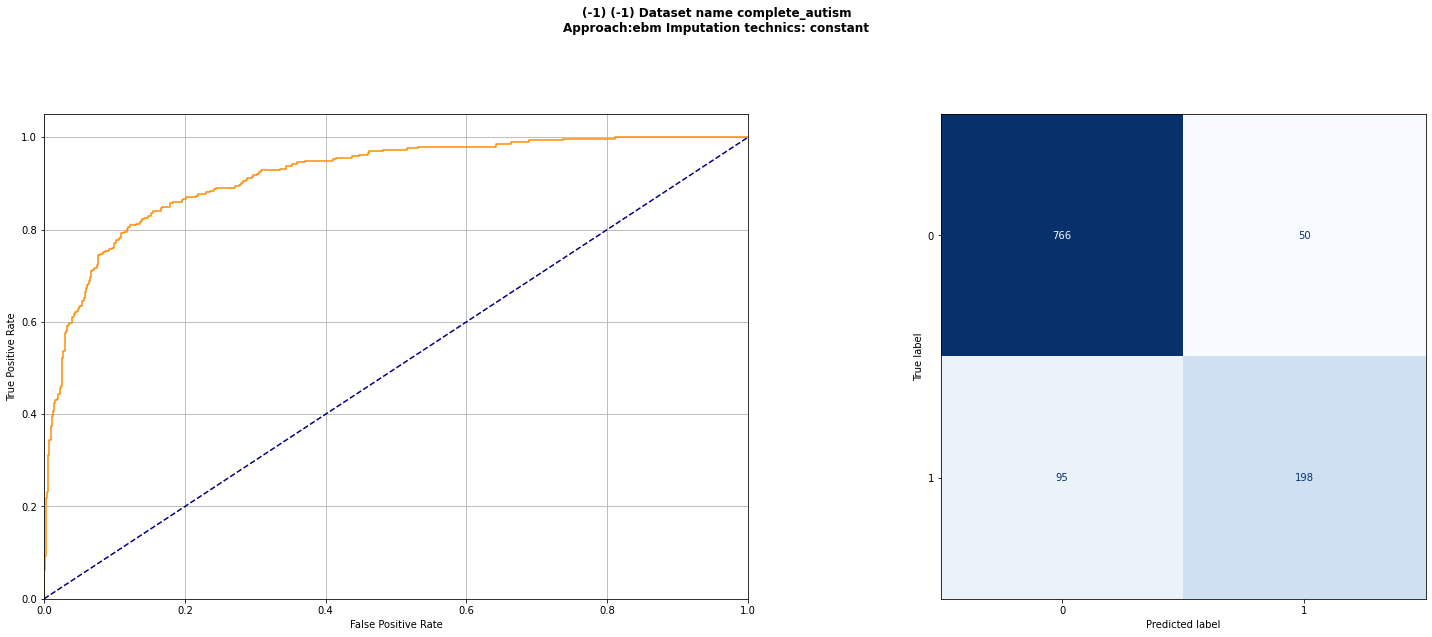

<!-- http://127.0.0.1:7001/139711730583440/ -->

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.862,0.721,0.741,0.17,0.951,0.786,0.168,0.819,0.639,0.874,0.787,0.704,0.915,0.126,0.296,0.085


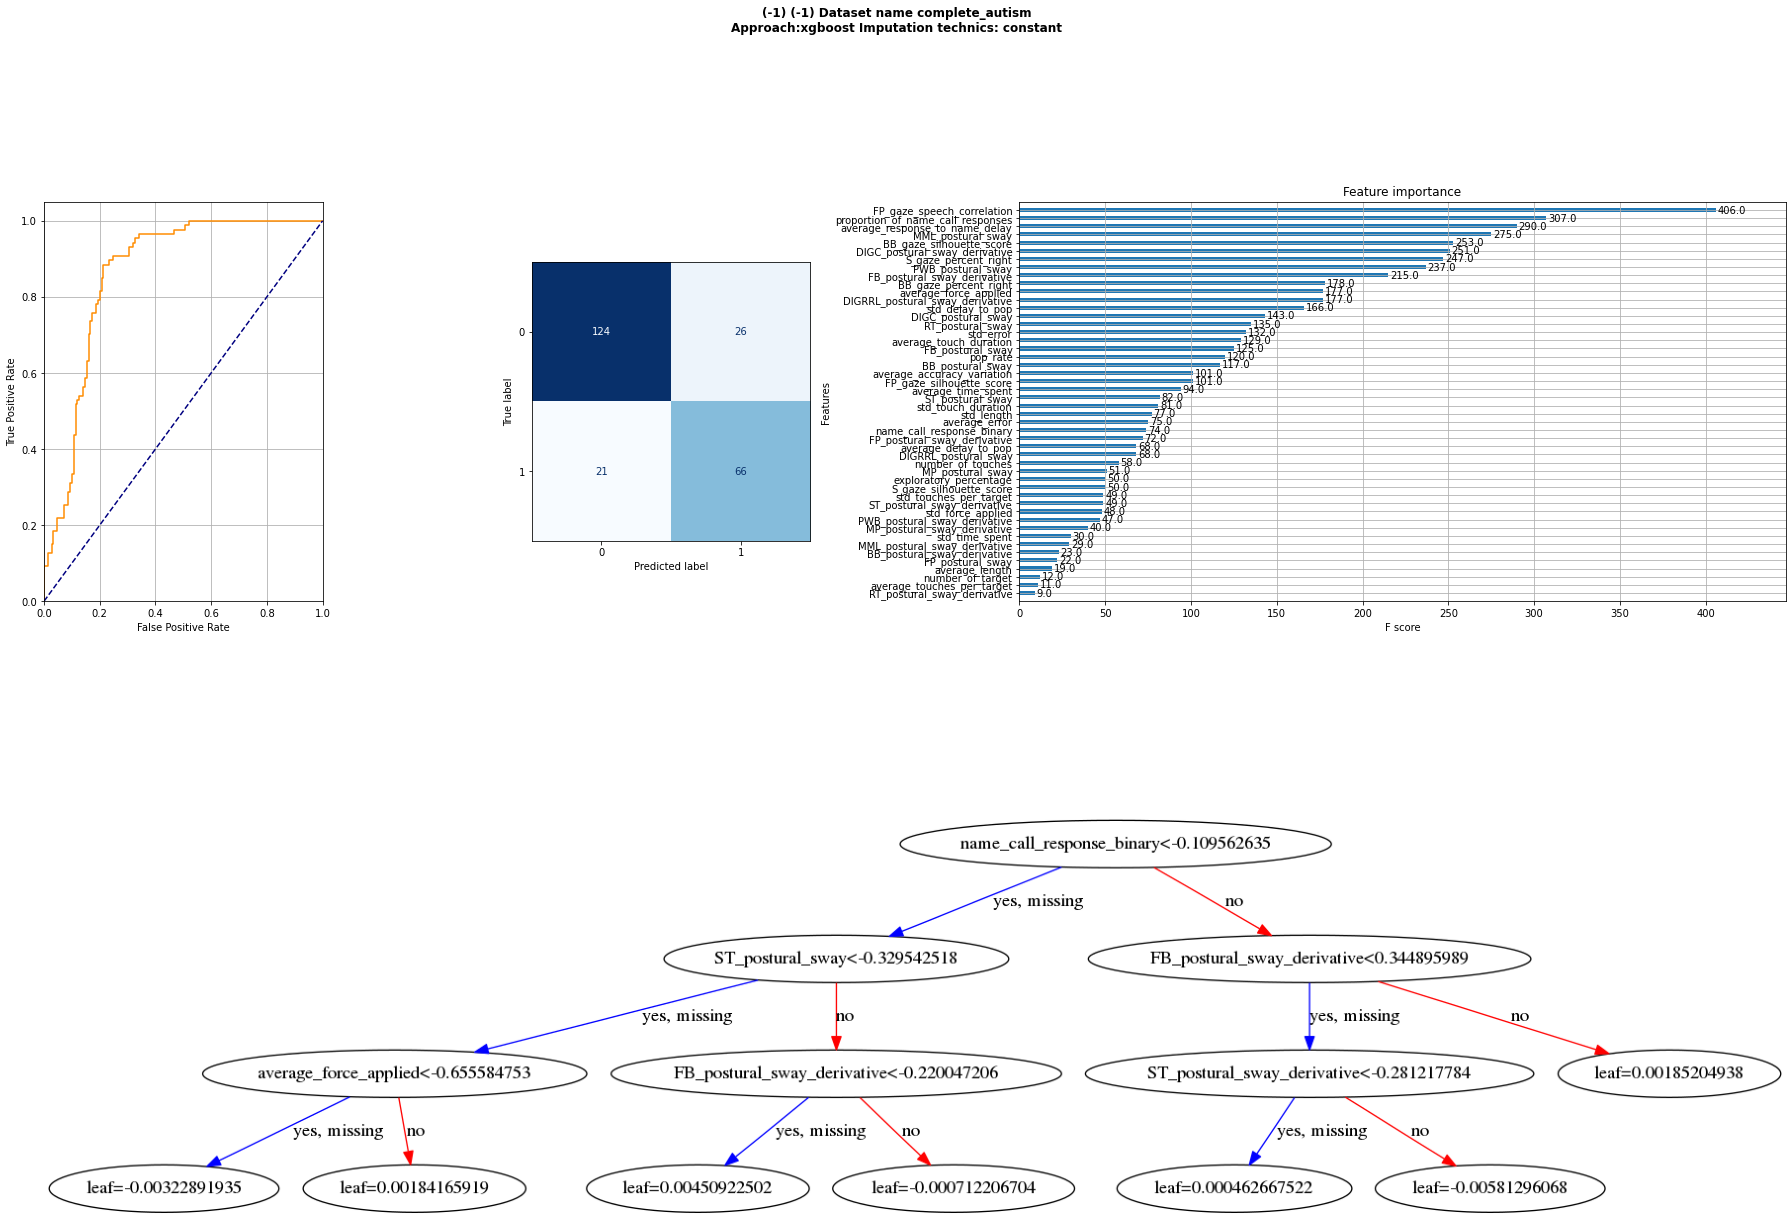

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.868,0.598,0.887,0.212,0.968,0.569,0.332,0.78,0.463,0.791,0.778,0.43,0.946,0.209,0.57,0.054


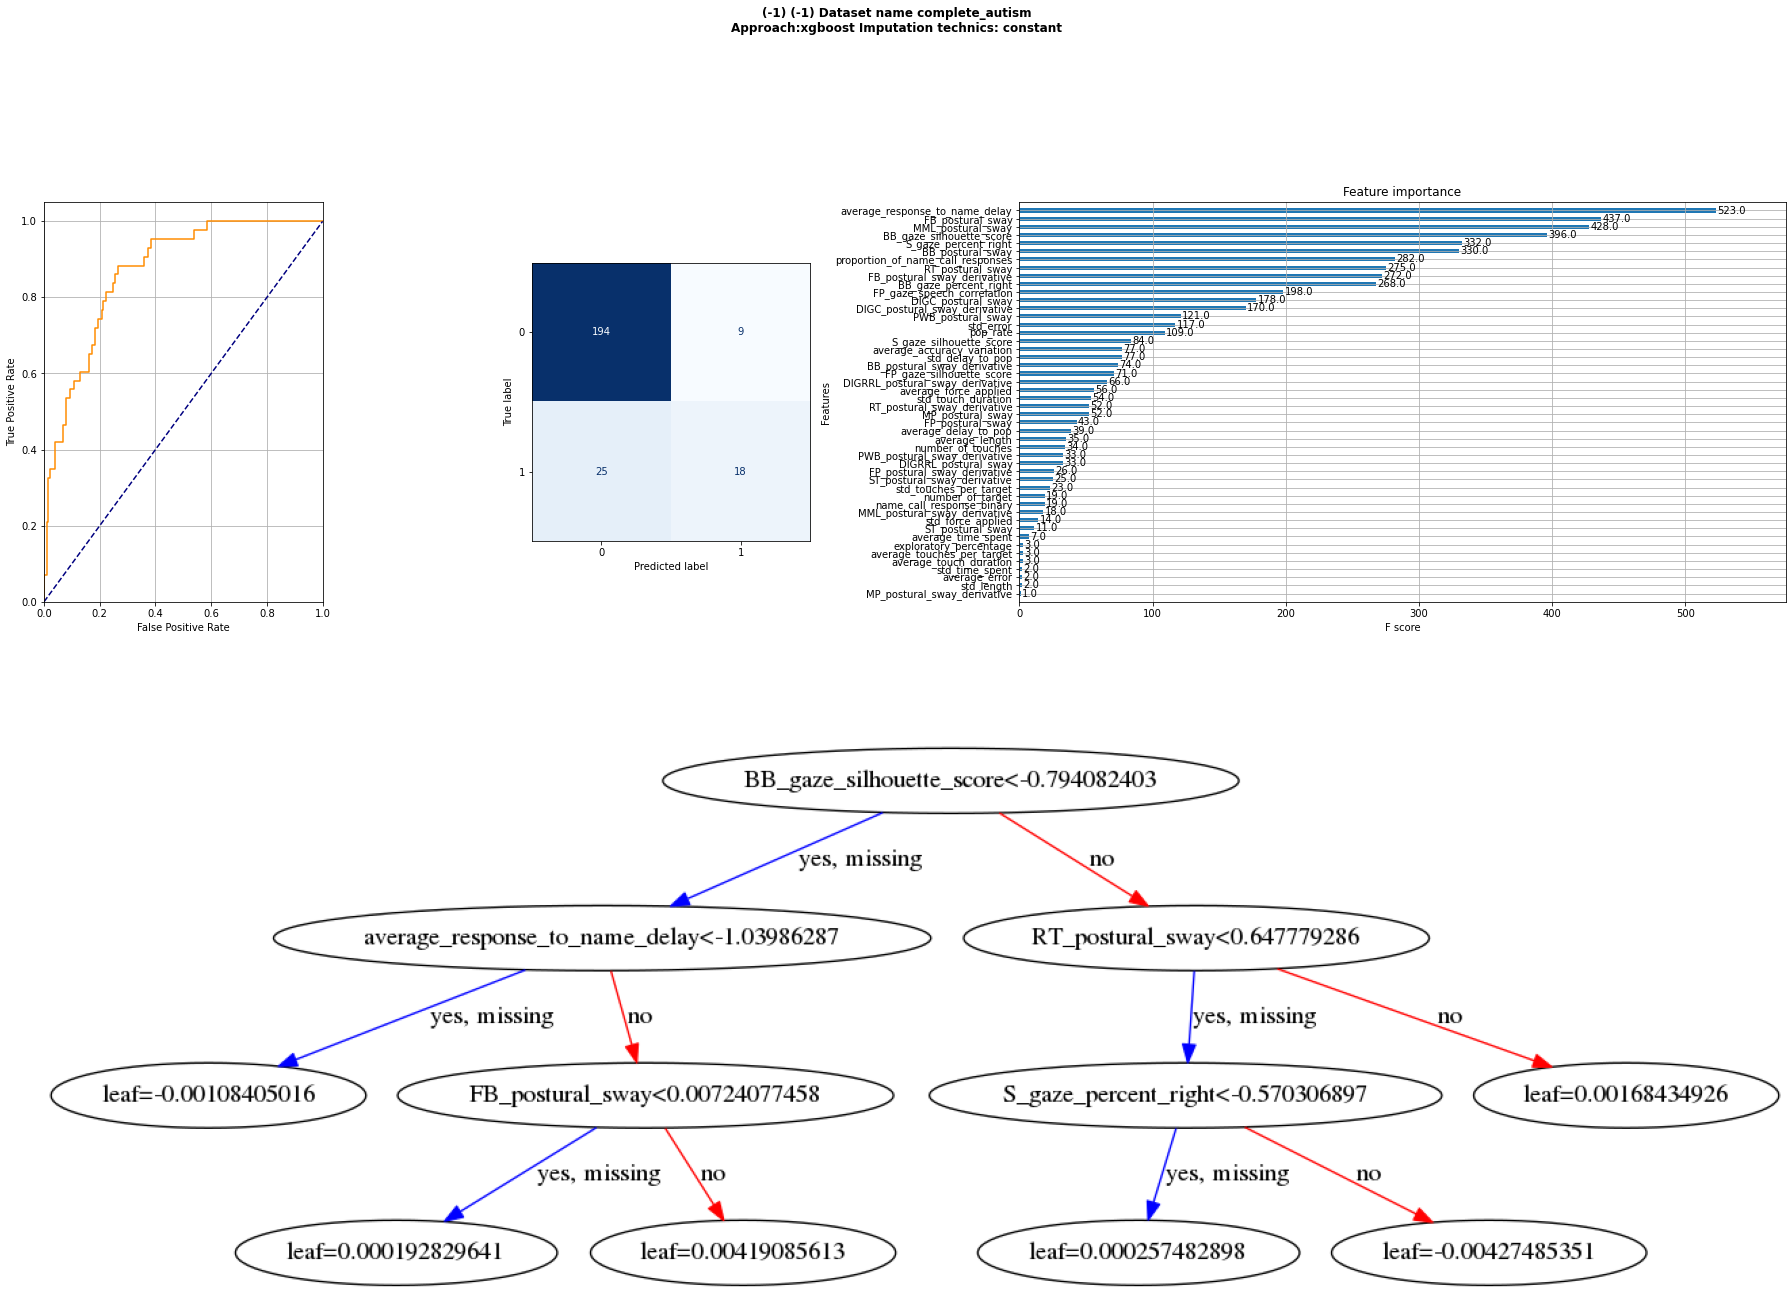

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV)
0,0.926,0.835,0.935,0.367,0.987,0.776,0.429,0.89,0.707,0.713,0.953,0.846,0.903,0.287,0.154,0.097


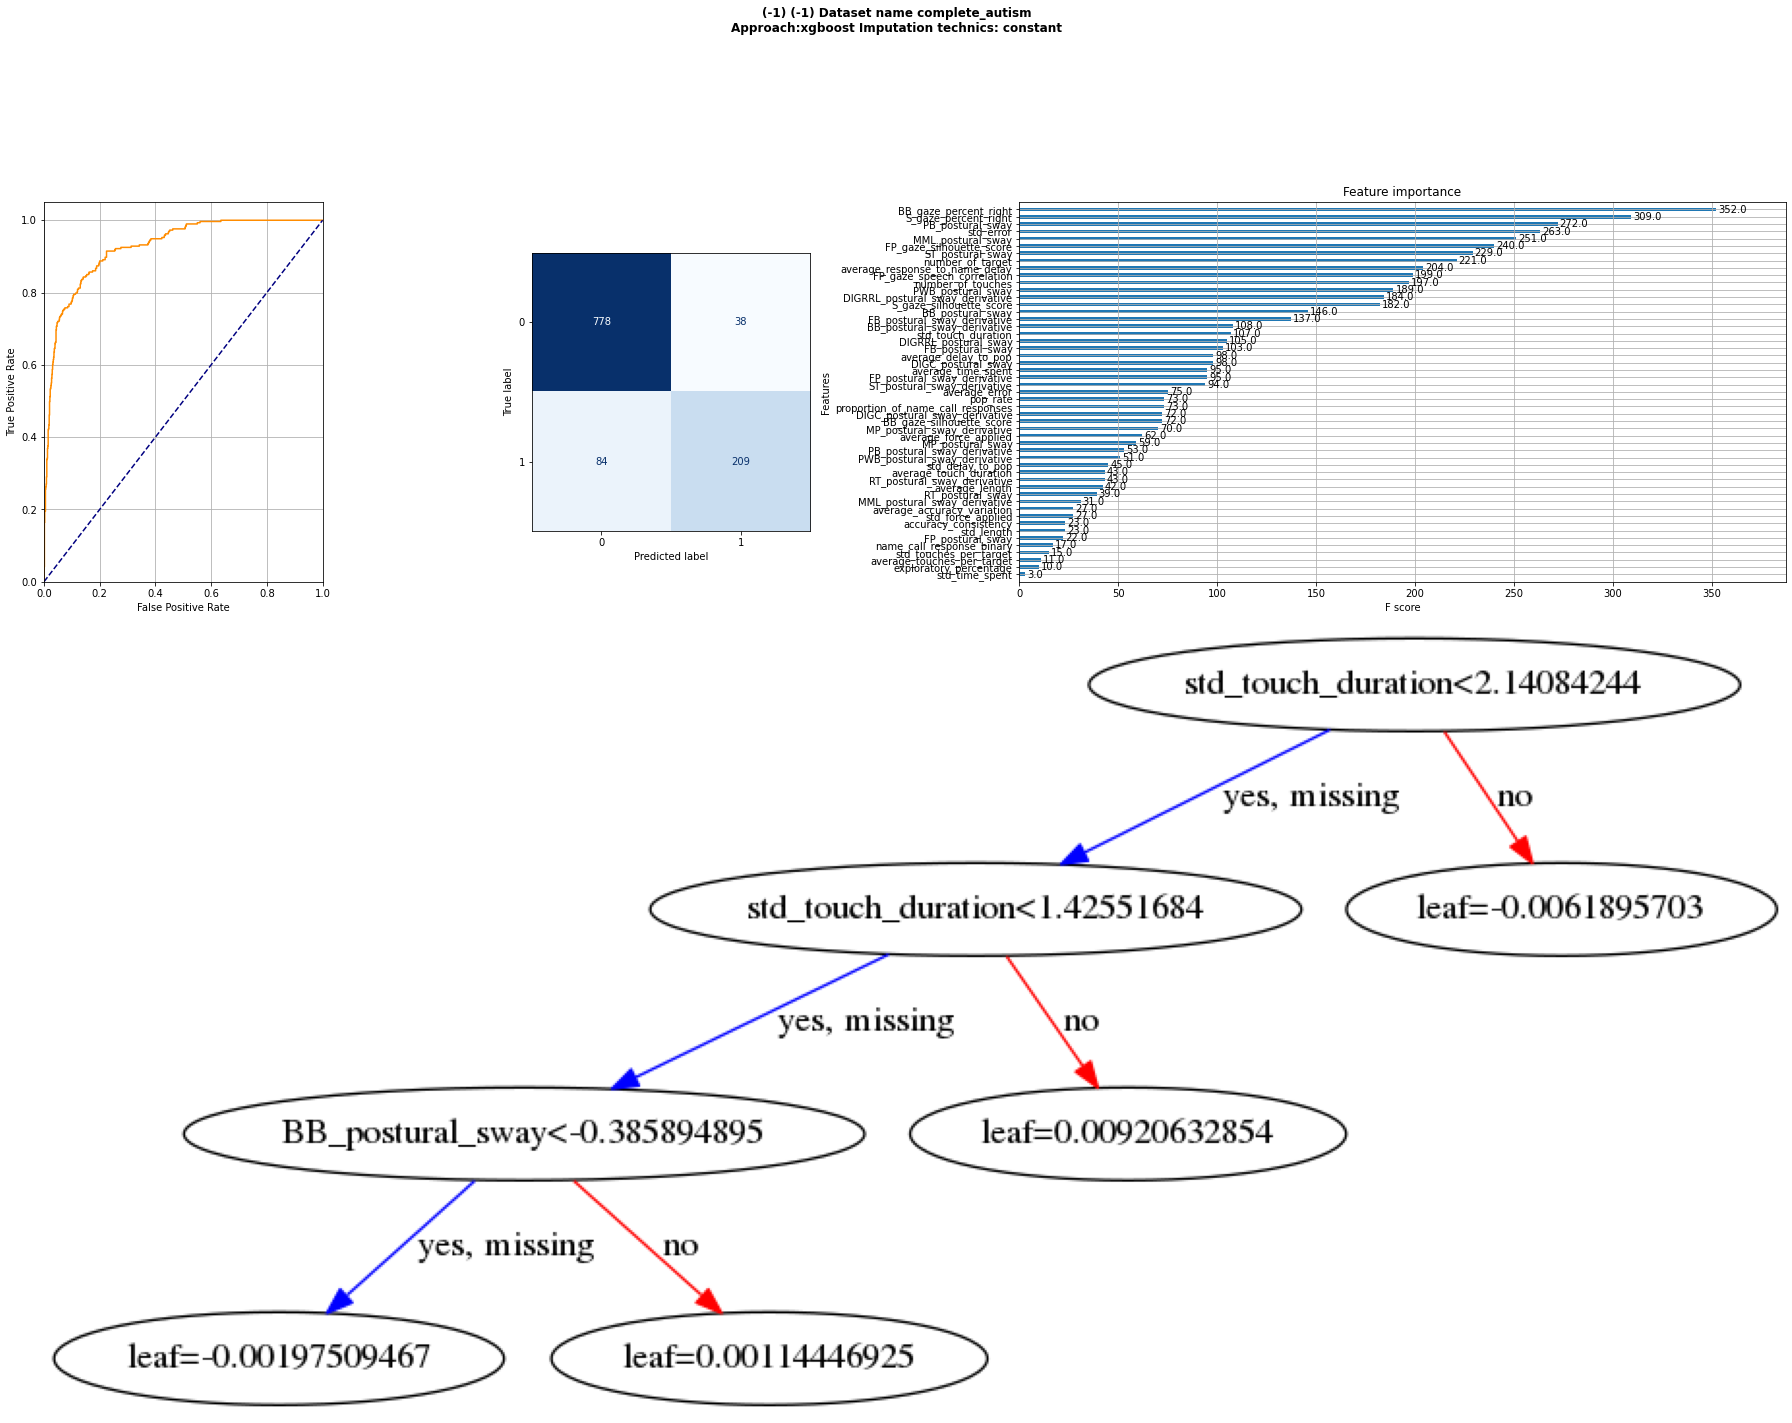

In [18]:
from interpret.glassbox import ExplainableBoostingClassifier

features = CVA_COLUMNS
set_of_features  = {}
features_importance = {'ebm': pd.DataFrame(columns=features), 
                       'xgboost': pd.DataFrame(columns=features)}

for approach in ['ebm', 'xgboost']:
    set_of_features[approach] = {}
    features_importance[approach] = pd.DataFrame(columns=features)
    for scenario in ['young', 'papers', 'all']:




        #df =  pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
        df =  pd.read_csv("/home01/sam/df_all.csv")
        data = Dataset(df=df, 
                       missing_data_handling='encoding', 
                       imputation_method='without', 
                       sampling_method='without',
                       outcome_column='diagnosis',
                        features_name = features, 
                        scale_data=True,
                        use_missing_indicator_variables=False,
                       verbosity=0,
                       scenario=scenario,
                       proportion_train=1)

        exp = Experiments(data.dataset_name,
                      dataset=data, 
                        approach=approach, 
                        previous_experiment=None,        
                        verbosity=1, 
                        debug=True, 
                        save_experiment=False)

        exp.fit_predict(num_cv=16)
        exp.plot()

        if exp.approach == 'ebm':

            # Store 15 best features for each scenario
            ebm_global = exp.model.explain_global()
            ordered_features = np.array(ebm_global.feature_names)[np.argsort(ebm_global._internal_obj['overall']['scores'])]
            ordered_features = [f for f in ordered_features if ' x ' not in f]

            set_of_features[approach][scenario] = ordered_features[-15:]
            dict_feature_importance = {feature_name:score/np.max(ebm_global._internal_obj['overall']['scores']) for feature_name, score in zip(DEFAULT_PREDICTORS, ebm_global._internal_obj['overall']['scores']) }
            
            scenario_feature_importance = pd.DataFrame(dict_feature_importance, index=[scenario])
            features_importance[approach] = features_importance[approach].append(scenario_feature_importance)

        elif exp.approach == 'xgboost':

            scenario_feature_importance = pd.DataFrame(exp.model.get_booster().get_score(importance_type='weight', fmap=''), index=[scenario])
            features_importance[approach] = features_importance[approach].append(scenario_feature_importance/scenario_feature_importance.max().max())

            set_of_features[approach][scenario] = pd.DataFrame(exp.model.get_booster().get_score(importance_type='weight', fmap=''), index=[0]).transpose()[0].sort_values(ascending=False).index[:15]


In [20]:
features_importance_xgboost = features_importance['xgboost'].transpose()
features_importance_ebm = features_importance['ebm'].transpose()

In [26]:
features_importance_ebm.fillna(-1, inplace=True)

<AxesSubplot:>

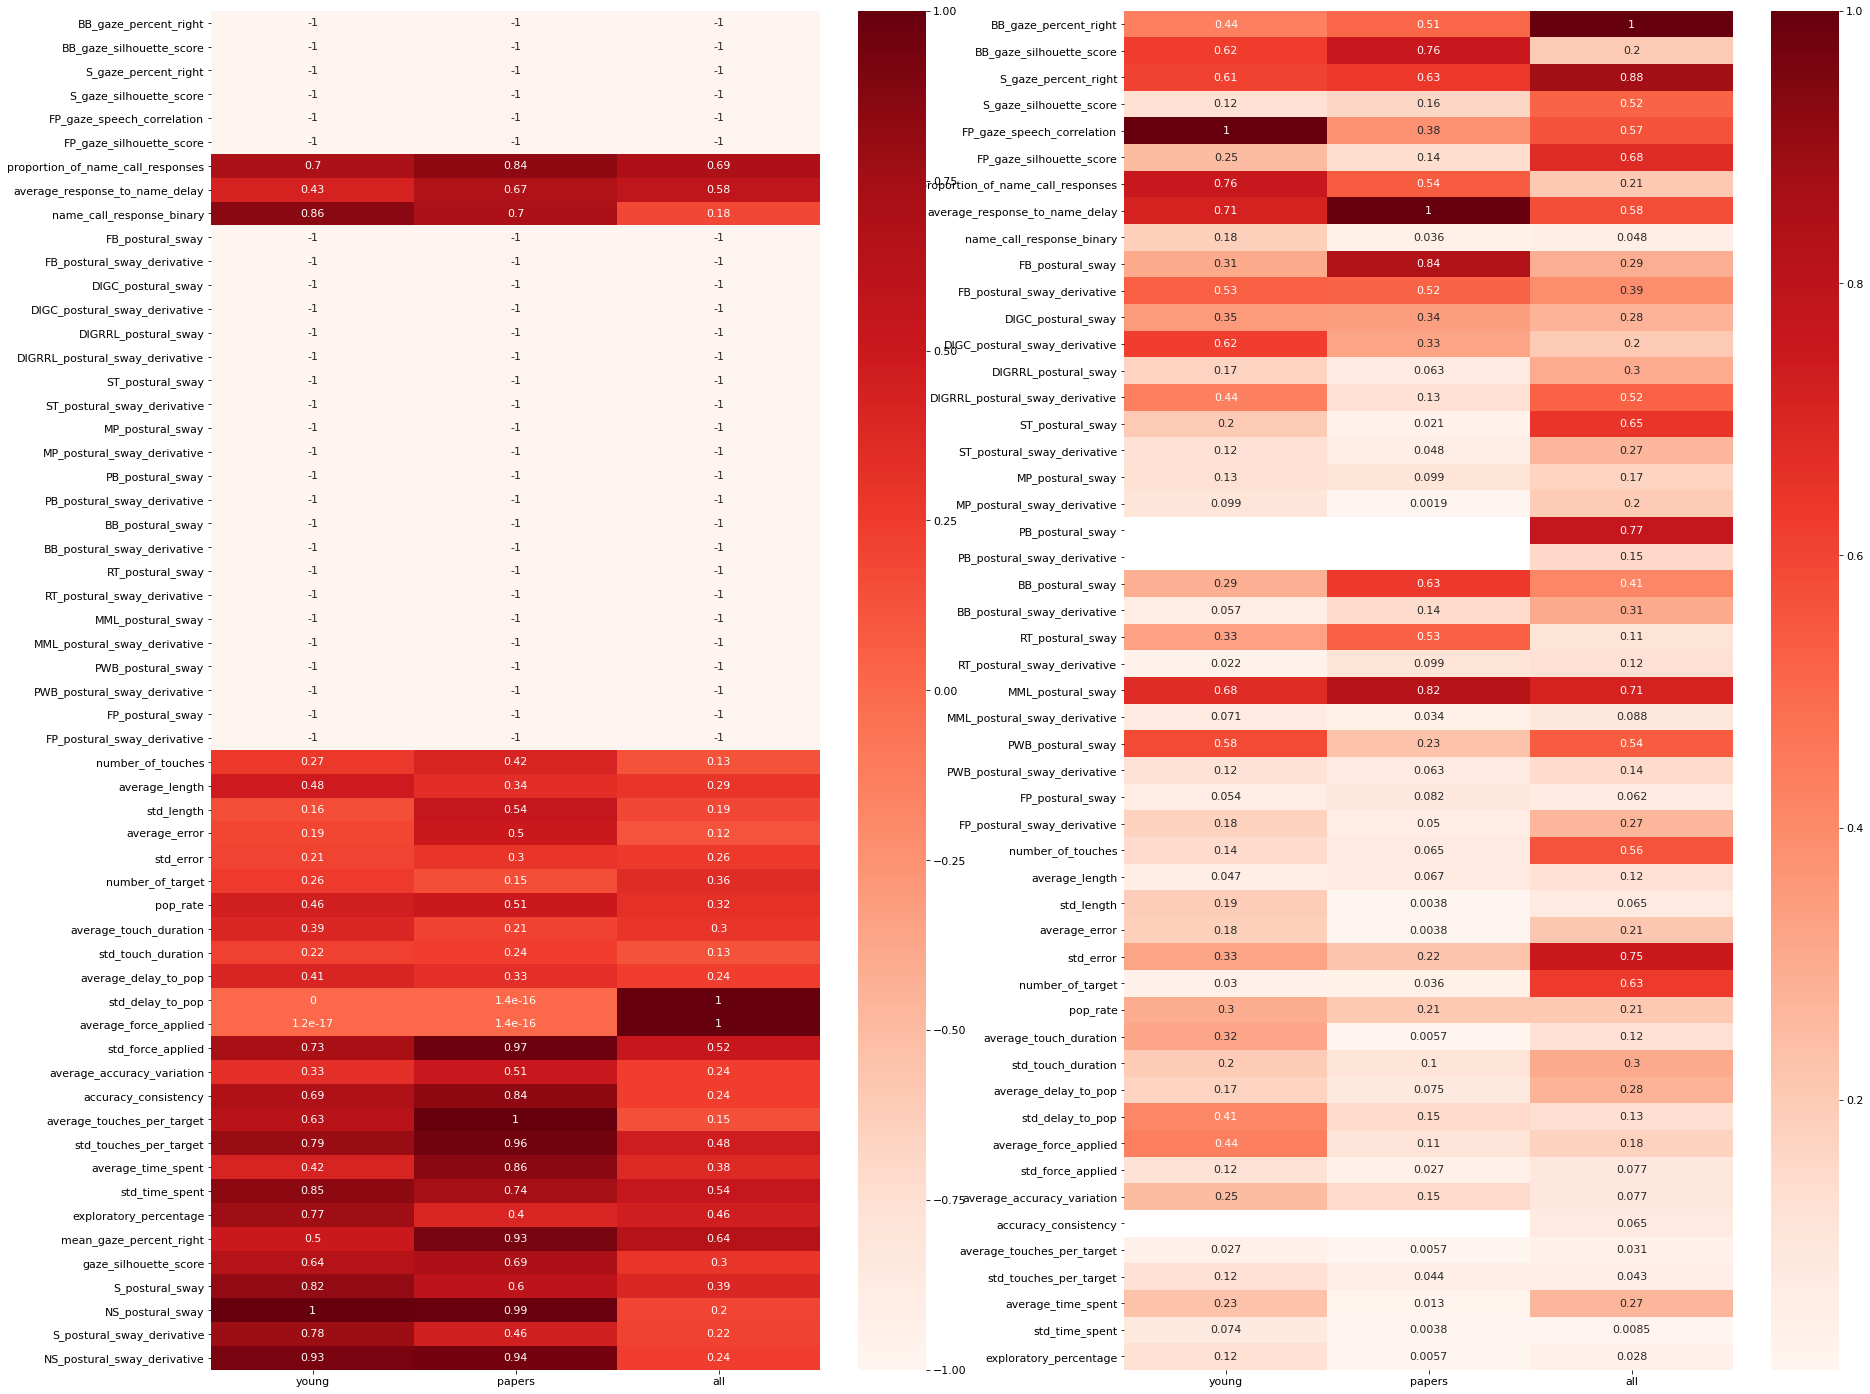

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 25))
sns.heatmap(features_importance_ebm, annot=True, ax=ax1, cmap='Reds')
sns.heatmap(features_importance_xgboost, annot=True, ax=ax2, cmap='Reds')


In [30]:
features_importance

{'ebm':        BB_gaze_percent_right BB_gaze_silhouette_score S_gaze_percent_right S_gaze_silhouette_score FP_gaze_speech_correlation FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  name_call_response_binary FB_postural_sway FB_postural_sway_derivative DIGC_postural_sway DIGC_postural_sway_derivative DIGRRL_postural_sway DIGRRL_postural_sway_derivative ST_postural_sway ST_postural_sway_derivative MP_postural_sway MP_postural_sway_derivative PB_postural_sway PB_postural_sway_derivative BB_postural_sway BB_postural_sway_derivative RT_postural_sway RT_postural_sway_derivative MML_postural_sway MML_postural_sway_derivative PWB_postural_sway PWB_postural_sway_derivative FP_postural_sway FP_postural_sway_derivative  number_of_touches  average_length  std_length  average_error  std_error  number_of_target  pop_rate  average_touch_duration  std_touch_duration  average_delay_to_pop  std_delay_to_pop  average_force_applied  std_force_applied  \
 young

In [31]:
set_of_features

{'ebm': {'young': ['BB_gaze_percent_right',
   'FP_postural_sway_derivative',
   'RT_postural_sway_derivative',
   'BB_gaze_silhouette_score',
   'RT_postural_sway',
   'S_gaze_percent_right',
   'BB_postural_sway',
   'PWB_postural_sway_derivative',
   'average_response_to_name_delay',
   'MML_postural_sway',
   'FP_gaze_silhouette_score',
   'PWB_postural_sway',
   'FP_gaze_speech_correlation',
   'name_call_response_binary',
   'proportion_of_name_call_responses'],
  'papers': ['S_gaze_silhouette_score',
   'FP_postural_sway',
   'average_delay_to_pop',
   'BB_gaze_silhouette_score',
   'FP_gaze_speech_correlation',
   'PWB_postural_sway',
   'RT_postural_sway',
   'S_gaze_percent_right',
   'MML_postural_sway_derivative',
   'BB_gaze_percent_right',
   'name_call_response_binary',
   'MML_postural_sway',
   'BB_postural_sway',
   'proportion_of_name_call_responses',
   'RT_postural_sway_derivative'],
  'all': ['DIGRRL_postural_sway_derivative',
   'MML_postural_sway_derivative',
  

In [5]:
set_of_features = {'young': ['std_touches_per_target',
  'exploratory_percentage',
  'NS_postural_sway_derivative',
  'std_force_applied',
  'std_length',
  'pop_rate',
  'NS_postural_sway',
  'average_delay_to_pop',
  'mean_gaze_percent_right',
  'average_response_to_name_delay',
  'S_postural_sway_derivative',
  'name_call_response_binary',
  'gaze_silhouette_score',
  'proportion_of_name_call_responses',
  'S_postural_sway'],
 'papers': ['std_touches_per_target',
  'average_error',
  'std_error',
  'average_response_to_name_delay',
  'NS_postural_sway',
  'pop_rate',
  'std_length',
  'std_delay_to_pop',
  'average_delay_to_pop',
  'mean_gaze_percent_right',
  'gaze_silhouette_score',
  'name_call_response_binary',
  'proportion_of_name_call_responses',
  'S_postural_sway_derivative',
  'S_postural_sway'],
 'all': ['std_length',
  'accuracy_consistency',
  'NS_postural_sway_derivative',
  'std_touch_duration',
  'exploratory_percentage',
  'average_touch_duration',
  'S_postural_sway_derivative',
  'NS_postural_sway',
  'average_delay_to_pop',
  'S_postural_sway',
  'std_error',
  'number_of_touches',
  'number_of_target',
  'gaze_silhouette_score',
  'mean_gaze_percent_right'],
 'asd_td_age_matched_n_balanced': ['average_length',
  'std_error',
  'pop_rate',
  'std_force_applied',
  'std_delay_to_pop',
  'NS_postural_sway',
  'std_length',
  'average_delay_to_pop',
  'mean_gaze_percent_right',
  'average_response_to_name_delay',
  'name_call_response_binary',
  'proportion_of_name_call_responses',
  'gaze_silhouette_score',
  'S_postural_sway_derivative',
  'S_postural_sway'],
 'asd_td_age_matched_n_unbalanced': ['std_force_applied',
  'number_of_target',
  'std_touches_per_target',
  'std_error',
  'std_length',
  'average_delay_to_pop',
  'pop_rate',
  'std_delay_to_pop',
  'average_response_to_name_delay',
  'mean_gaze_percent_right',
  'S_postural_sway_derivative',
  'gaze_silhouette_score',
  'name_call_response_binary',
  'S_postural_sway',
  'proportion_of_name_call_responses']}

## Experiment 1.  `use_missing_indicator_variables`

In [ ]:

for i, n_features in enumerate(range(6)):
    for j, scenario in enumerate(['young', 'papers']):
        
        for use_missing_indicator_variables in [True, False]:
            
            for approach in ["LogisticRegression", "DecisionTree", "nam", "ebm", 'xgboost']:
                try:
                    #df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
                    df = pd.read_csv("/home01/sam/df_all.csv")


                    data = Dataset(df=df, 
                                   missing_data_handling='encoding',
                                   imputation_method='without',
                                   sampling_method='without',
                                   scenario = scenario, 
                                   features_name = set_of_features[scenario][-n_features:],
                                   scale_data=True, 
                                   use_missing_indicator_variables=use_missing_indicator_variables,
                                   verbosity=1, 
                                   proportion_train=1)

                    exp = Experiments(data.dataset_name,
                                      dataset=data, 
                                      approach=approach, 
                                      previous_experiment=None,        
                                      debug=True, 
                                      verbosity=0, 
                                      save_experiment=True)
                    exp.fit_predict(num_cv=16)
                except:
                    print("Faile on ", scenario, n_features, approach)
                    pass

Doing experiment 591!
Doing experiment 592!
Doing experiment 593!
Doing experiment 594!
Doing experiment 595!
Doing experiment 596!
Doing experiment 597!
Doing experiment 598!
Doing experiment 599!
Doing experiment 600!
Doing experiment 601!
Doing experiment 602!
Doing experiment 603!
Doing experiment 604!
Doing experiment 605!
Doing experiment 606!
Doing experiment 607!
Doing experiment 608!
Doing experiment 609!
Doing experiment 610!
Doing experiment 611!
Doing experiment 612!
Doing experiment 613!
Doing experiment 614!
Doing experiment 615!
Doing experiment 616!
Doing experiment 617!
Doing experiment 618!
Doing experiment 619!
Doing experiment 620!
Doing experiment 621!
Doing experiment 622!
Doing experiment 623!
Doing experiment 624!
Doing experiment 625!
Doing experiment 626!
Doing experiment 627!
Doing experiment 628!
Doing experiment 629!
Doing experiment 630!
Doing experiment 631!
Doing experiment 632!
Doing experiment 633!
Doing experiment 634!
Doing experiment 635!
Doing expe

## Experiment 2  `scale_data`

In [ ]:

for i, n_features in enumerate(range(6)):
    for j, scenario in enumerate(['young', 'papers', 'all', 'asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced']):
        
        for scale_data in [True, False]:
            
            for approach in ["LogisticRegression", "DecisionTree", "nam", "ebm", 'xgboost']:
                
                try:
                    #df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
                    df = pd.read_csv("/home01/sam/df_all.csv")

                    data = Dataset(df=df, 
                                   missing_data_handling='encoding',
                                   imputation_method='without',
                                   sampling_method='without',
                                   scenario = scenario, 
                                   features_name = set_of_features[scenario][-n_features:],
                                   scale_data=scale_data, 
                                   use_missing_indicator_variables=False,
                                   verbosity=1, 
                                   proportion_train=1)

                    exp = Experiments(data.dataset_name,
                                      dataset=data, 
                                      approach=approach, 
                                      previous_experiment=None,        
                                      debug=True, 
                                      verbosity=0, 
                                      save_experiment=True)
                    exp.fit_predict(num_cv=16)
                except:
                    print("Faile on ", scenario, n_features, approach)
                    pass

Doing experiment 1!
Doing experiment 2!
Doing experiment 3!
Doing experiment 4!
Doing experiment 5!
Doing experiment 6!
Doing experiment 7!
Doing experiment 8!
Doing experiment 9!
Doing experiment 10!
Doing experiment 11!
Doing experiment 12!
Doing experiment 13!
Doing experiment 14!
Doing experiment 15!
Doing experiment 16!
Doing experiment 17!
Doing experiment 18!
Doing experiment 19!
Doing experiment 20!
Doing experiment 21!
Doing experiment 22!
Doing experiment 23!
Doing experiment 24!
Doing experiment 25!
Doing experiment 26!
Doing experiment 27!
Doing experiment 28!
Doing experiment 29!
Doing experiment 30!
Doing experiment 31!
Doing experiment 32!
Doing experiment 33!
Doing experiment 34!
Doing experiment 35!
Doing experiment 36!
Doing experiment 37!
Doing experiment 38!
Doing experiment 39!
Doing experiment 40!
Doing experiment 41!
Doing experiment 42!
Doing experiment 43!
Doing experiment 44!
Doing experiment 45!
Doing experiment 46!
Doing experiment 47!
Doing experiment 48!
D

## Experiment 3. `Imputation approach`

In [ ]:

for i, n_features in enumerate(range(len(set_of_features['young']))):
    for j, scenario in enumerate(['young', 'papers', 'all', 'asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced']):
        
        for imputation_method in ['without','mice', 'knn', 'mean']:
            
            for approach in ["LogisticRegression", "DecisionTree", "nam", "ebm", 'xgboost']:
                
                try:
                    #df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
                    df = pd.read_csv("/home01/sam/df_all.csv")

                    data = Dataset(df=df, 
                                   missing_data_handling='imputation',
                                   imputation_method=imputation_method,
                                   sampling_method='without',
                                   scenario = scenario, 
                                   features_name = set_of_features[scenario][-n_features:],
                                   scale_data=True, 
                                   use_missing_indicator_variables=False,
                                   verbosity=1, 
                                   proportion_train=1)

                    exp = Experiments(data.dataset_name,
                                      dataset=data, 
                                      approach=approach, 
                                      previous_experiment=None,        
                                      debug=True, 
                                      verbosity=0, 
                                      save_experiment=True)
                    exp.fit_predict(num_cv=16)
                
                except:
                    print("Faile on ", scenario, n_features, approach)
                    pass

## Experiment 4. `Sampling approach`

In [ ]:

for i, n_features in enumerate(range(len(set_of_features['young']))):
    for j, scenario in enumerate(['young', 'papers', 'all', 'asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced']):
        
        for sampling_method in ['without', 'vanilla', 'smote']:
            
            for approach in ["LogisticRegression", "DecisionTree", "nam", "ebm", 'xgboost']:
                try:
                    #df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
                    df = pd.read_csv("/home01/sam/df_all.csv")

                    data = Dataset(df=df, 
                                   missing_data_handling='encoding',
                                   imputation_method='without',
                                   sampling_method=sampling_method,
                                   scenario = scenario, 
                                   features_name = set_of_features[scenario][-n_features:],
                                   scale_data=True, 
                                   use_missing_indicator_variables=False,
                                   verbosity=1, 
                                   proportion_train=1)

                    exp = Experiments(data.dataset_name,
                                      dataset=data, 
                                      approach=approach, 
                                      previous_experiment=None,        
                                      debug=True, 
                                      verbosity=0, 
                                      save_experiment=True)
                    exp.fit_predict(num_cv=16)
                except:
                    print("Faile on ", scenario, n_features, approach)
                    pass

## Experiment 5. `num_cv`

In [ ]:

for i, n_features in enumerate(range(len(set_of_features['young']))):
    for j, scenario in enumerate(['young', 'papers', 'all', 'asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced']):
        
        for num_cv in [8, 16]:
            
            for approach in ["LogisticRegression", "DecisionTree", "nam", "ebm", 'xgboost']:
                try:
                    #df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
                    df = pd.read_csv("/home01/sam/df_all.csv")

                    data = Dataset(df=df, 
                                   missing_data_handling='encoding',
                                   imputation_method='without',
                                   sampling_method='without',
                                   scenario = scenario, 
                                   features_name = set_of_features[scenario][-n_features:],
                                   scale_data=True, 
                                   use_missing_indicator_variables=False,
                                   verbosity=1, 
                                   proportion_train=1)

                    exp = Experiments(data.dataset_name,
                                      dataset=data, 
                                      approach=approach, 
                                      previous_experiment=None,        
                                      debug=True, 
                                      verbosity=0, 
                                      save_experiment=True)
                    exp.fit_predict(num_cv=num_cv)
                except:
                    print("Faile on ", scenario, n_features, approach)
                    pass
            

## Experiment 6. `n_features`

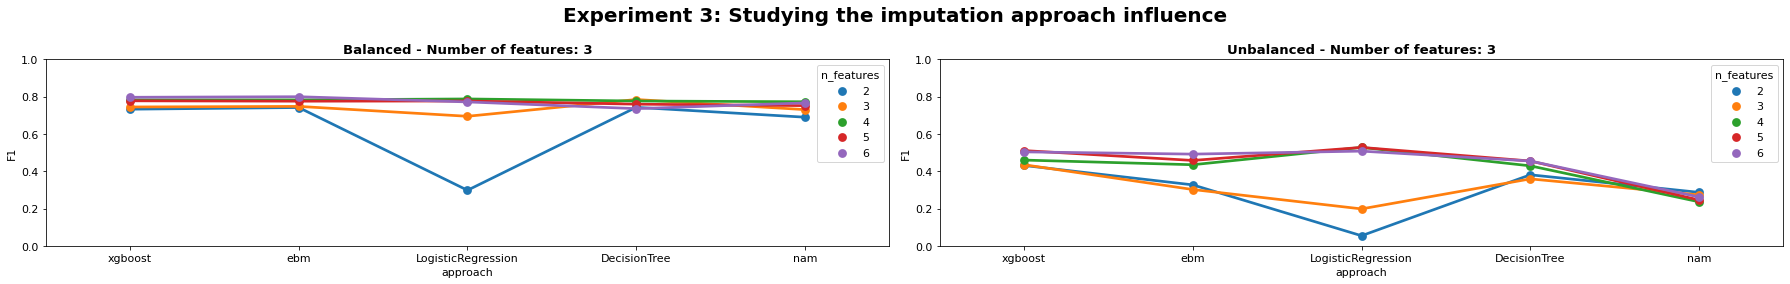

In [247]:

fig, axes = plt.subplots(1, 2, figsize=(25, 4));axes = axes[np.newaxis, :]
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

i=0
for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

    results = df[(df['missing_data_handling'] == 'encoding') &
                 (df['use_missing_indicator_variables'] == False) &
                 (df['scale_data'] == True) &
                 (df['num_cv'] == 16) &
                 (df['sampling_method'] == 'without') &
                 (df['scenario'] == scenario)]

    assert len(results) == 5*5

    axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='n_features', ci='sd', ax = axes[i][j])
    axes[i][j].set_ylim([0,1])
    axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

plt.tight_layout()

## Experiment 7. `approach`

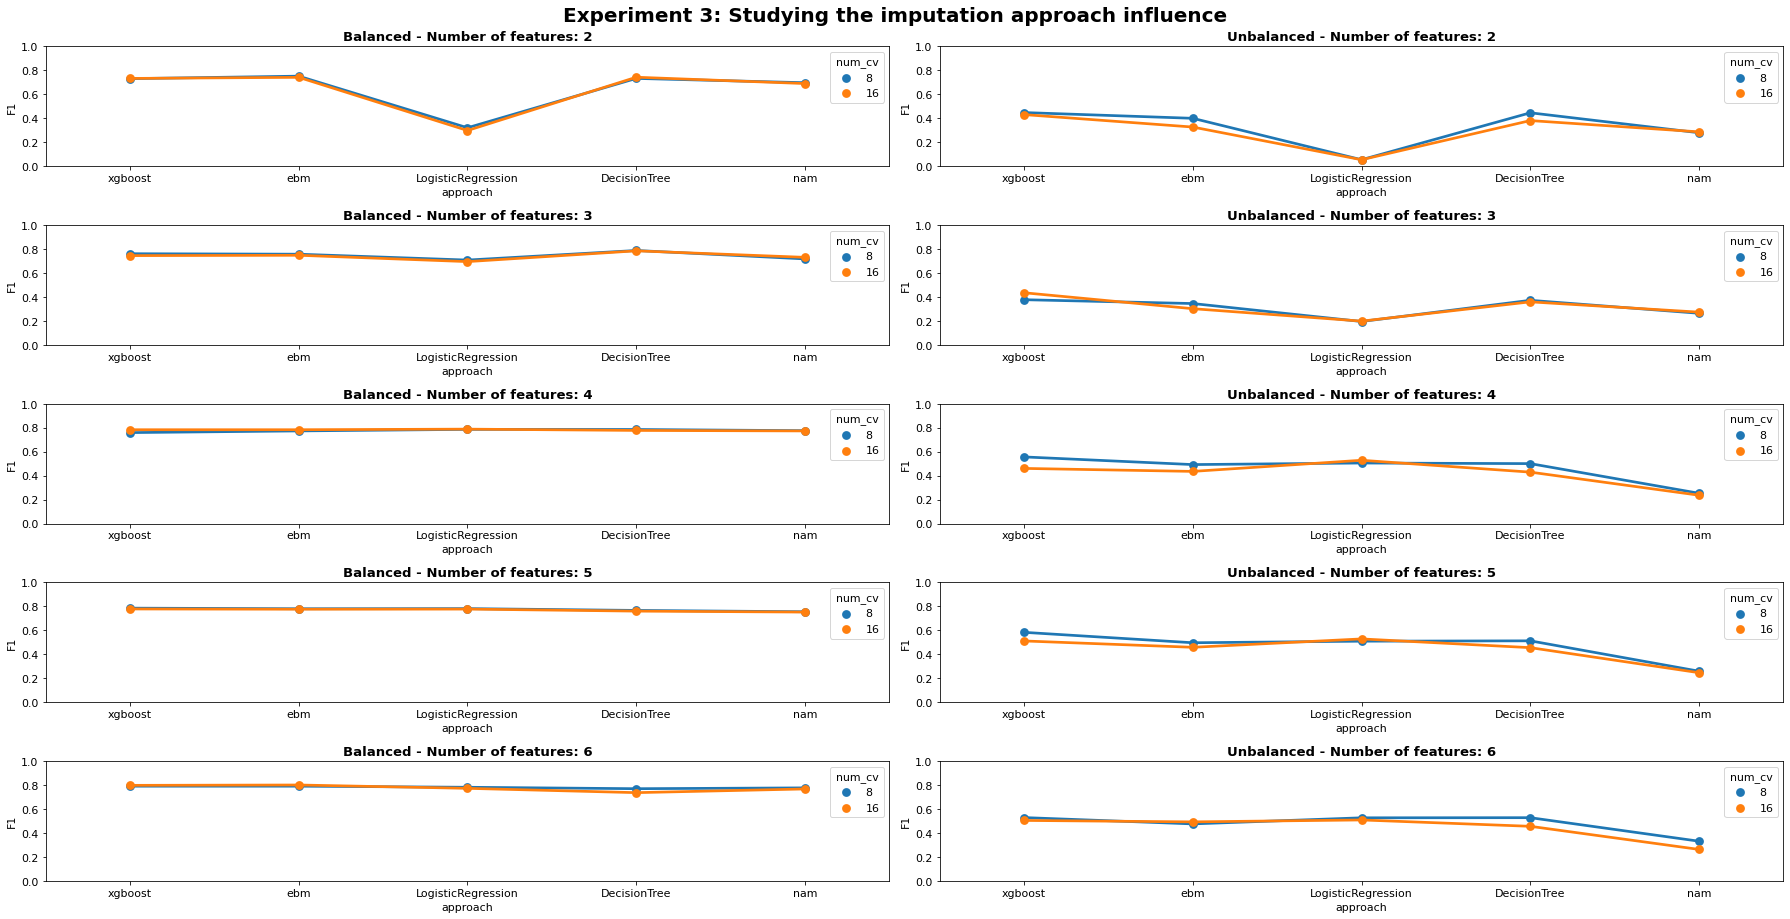

In [248]:
fig, axes = plt.subplots(5, 2, figsize=(25, 13))
fig.suptitle("Experiment 3: Studying the imputation approach influence", weight='bold', fontsize=20)

for i, n_features in enumerate(sorted(df['n_features'].unique(), reverse=False)):
    for j, (scenario, label) in enumerate(zip(['asd_td_age_matched_n_balanced', 'asd_td_age_matched_n_unbalanced'], ['Balanced', 'Unbalanced'])):

        results = df[(df['missing_data_handling'] == 'encoding') &
                     (df['use_missing_indicator_variables'] == False) &
                     (df['sampling_method'] == 'without') &
                     (df['scale_data'] == True) &
                     (df['scenario'] == scenario) &
                     (df['n_features'] == n_features)]
        
        assert len(results) == 5*2

        axes[i][j] = sns.pointplot(data=results, x="approach", order=df['approach'].unique(), y="F1", hue='num_cv', ci='sd', ax = axes[i][j])
        axes[i][j].set_ylim([0,1])
        axes[i][j].set_title("{} - Number of features: {}".format(label, n_features), weight='bold')

    plt.tight_layout()

In [255]:
df.sort_values(by='F1')

for scenario, results in df.groupby('scenario'):
    print("\n\n\nScenatio: {}".format(scenario))
    display(results.sort_values(by=['F1'], ascending = False).head(10))




Scenatio: asd_td_age_matched_n_balanced


,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,auc,Accuracy,F1,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
3896,complete_autism,1703,xgboost,imputation,knn,"['S_postural_sway', 'mean_gaze_percent_right',...",6,False,True,smote,asd_td_age_matched_n_balanced,237,0.926829,0.165963,0.098916,0.238304,20,0.2,2.599746,8,NaN,0.819,0.817,0.639,0.842,0.797,0.793,0.793,0.845,0.158,0.207,0.155
2700,complete_autism,1503,xgboost,imputation,knn,"['S_postural_sway', 'mean_gaze_percent_right',...",6,False,True,vanilla,asd_td_age_matched_n_balanced,237,0.926829,0.165963,0.098916,0.238304,20,0.2,2.667968,8,NaN,0.819,0.817,0.639,0.842,0.797,0.793,0.793,0.845,0.158,0.207,0.155
3159,complete_autism,1303,xgboost,imputation,knn,"['S_postural_sway', 'mean_gaze_percent_right',...",6,False,True,without,asd_td_age_matched_n_balanced,237,0.926829,0.165963,0.098916,0.238304,20,0.2,2.613392,8,NaN,0.819,0.817,0.639,0.842,0.797,0.793,0.793,0.845,0.158,0.207,0.155
4200,complete_autism,893,xgboost,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,vanilla,asd_td_age_matched_n_balanced,237,0.926829,0.082982,0.049458,0.119152,20,0.2,9.416015,16,NaN,0.814,0.814,0.631,0.842,0.789,0.787,0.787,0.843,0.158,0.213,0.157
216,complete_autism,1093,xgboost,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,smote,asd_td_age_matched_n_balanced,237,0.926829,0.082982,0.049458,0.119152,20,0.2,6.773226,16,NaN,0.814,0.814,0.631,0.842,0.789,0.787,0.787,0.843,0.158,0.213,0.157
2951,complete_autism,693,xgboost,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,without,asd_td_age_matched_n_balanced,237,0.926829,0.082982,0.049458,0.119152,20,0.2,4.839285,16,NaN,0.814,0.814,0.631,0.842,0.789,0.787,0.787,0.843,0.158,0.213,0.157
4601,complete_autism,403,xgboost,encoding,constant,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,smote,asd_td_age_matched_n_balanced,237,0.926829,0.082982,0.049458,0.119152,20,0.2,13.631719,8,NaN,0.802,0.802,0.606,0.833,0.772,0.772,0.772,0.833,0.167,0.228,0.167
4188,complete_autism,2683,xgboost,encoding,constant,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,vanilla,asd_td_age_matched_n_balanced,237,0.926829,0.082982,0.049458,0.119152,20,0.2,3.315661,8,NaN,0.802,0.802,0.606,0.833,0.772,0.772,0.772,0.833,0.167,0.228,0.167
2715,complete_autism,2483,xgboost,encoding,constant,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,without,asd_td_age_matched_n_balanced,237,0.926829,0.082982,0.049458,0.119152,20,0.2,2.730200,8,NaN,0.802,0.802,0.606,0.833,0.772,0.772,0.772,0.833,0.167,0.228,0.167
3254,complete_autism,3,xgboost,encoding,constant,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,without,asd_td_age_matched_n_balanced,237,0.926829,0.082982,0.049458,0.119152,20,0.2,39.412693,8,NaN,0.802,0.802,0.606,0.833,0.772,0.772,0.772,0.833,0.167,0.228,0.167





Scenatio: asd_td_age_matched_n_unbalanced


,dataset_name,experiment_number,approach,missing_data_handling,imputation_method,features_name,n_features,use_missing_indicator_variables,scale_data,sampling_method,scenario,num_samples,imbalance_ratio,ratio_of_missing_values,ratio_missing_per_class_0,ratio_missing_per_class_1,resolution,bandwidth,estimation_time,num_cv,auc,Accuracy,F1,MCC,Sensitivity,Specificity,Precision,PPV,NPV,FNR,FDR,FOR
3983,complete_autism,687,DecisionTree,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,without,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007466,8,NaN,0.818,0.667,0.550,0.750,0.840,0.600,0.600,0.913,0.250,0.400,0.087
3394,complete_autism,887,DecisionTree,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,vanilla,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007761,8,NaN,0.818,0.667,0.550,0.750,0.840,0.600,0.600,0.913,0.250,0.400,0.087
3528,complete_autism,1087,DecisionTree,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,True,smote,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007076,8,NaN,0.818,0.667,0.550,0.750,0.840,0.600,0.600,0.913,0.250,0.400,0.087
1331,complete_autism,3567,DecisionTree,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,smote,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007493,8,NaN,0.808,0.632,0.506,0.681,0.849,0.590,0.590,0.893,0.319,0.410,0.107
140,complete_autism,3367,DecisionTree,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,vanilla,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007474,8,NaN,0.808,0.632,0.506,0.681,0.849,0.590,0.590,0.893,0.319,0.410,0.107
4770,complete_autism,3167,DecisionTree,imputation,mice,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,without,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007915,8,NaN,0.808,0.632,0.506,0.681,0.849,0.590,0.590,0.893,0.319,0.410,0.107
1222,complete_autism,3967,DecisionTree,imputation,knn,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,vanilla,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007267,8,NaN,0.805,0.613,0.484,0.639,0.858,0.590,0.590,0.881,0.361,0.410,0.119
2729,complete_autism,3767,DecisionTree,imputation,knn,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,without,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007235,8,NaN,0.805,0.613,0.484,0.639,0.858,0.590,0.590,0.881,0.361,0.410,0.119
45,complete_autism,4167,DecisionTree,imputation,knn,"['S_postural_sway', 'mean_gaze_percent_right',...",6,True,False,smote,asd_td_age_matched_n_unbalanced,297,0.32,0.044052,0.029630,0.089120,20,0.2,0.007889,8,NaN,0.805,0.613,0.484,0.639,0.858,0.590,0.590,0.881,0.361,0.410,0.119
2928,complete_autism,650,xgboost,without,without,"['S_postural_sway', 'mean_gaze_percent_right',...",5,True,True,vanilla,asd_td_age_matched_n_unbalanced,297,0.32,0.043771,0.029333,0.088889,20,0.2,3.062647,8,NaN,0.815,0.610,0.489,0.597,0.884,0.623,0.623,0.873,0.403,0.377,0.127
